
DataFrame com clusters e espécies reais:
   cluster     species
0        1      setosa
1        2      setosa
2        0  versicolor
3        0   virginica
4        1      setosa
5        0  versicolor

Tabela Cruzada (Cluster vs Espécie Real):
species  setosa  versicolor  virginica
cluster                               
0             0           2          1
1             2           0          0
2             1           0          0

Inércia com k=3: 1.0900000000000003


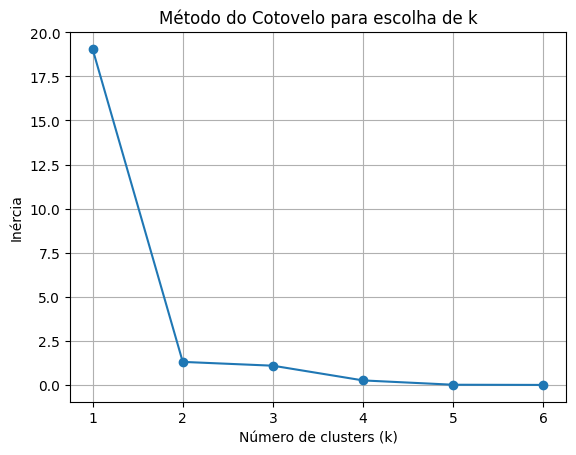

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Simulação de amostras (samples) com 6 pontos fictícios
samples = [
    [5.1, 3.5, 1.4, 0.2],
    [4.9, 3.0, 1.4, 0.2],
    [6.2, 2.9, 4.3, 1.3],
    [6.7, 3.1, 4.7, 1.5],
    [5.0, 3.6, 1.4, 0.2],
    [6.0, 2.2, 4.0, 1.0]
]

# Criar o modelo KMeans com 3 clusters e treinar com as amostras
model = KMeans(n_clusters=3, random_state=42)
cluster_labels = model.fit_predict(samples)

# Lista de espécies reais correspondente às amostras (mesmo tamanho!)
true_species = ["setosa", "setosa", "versicolor", "virginica", "setosa", "versicolor"]

# Criar DataFrame
df = pd.DataFrame({
    'cluster': cluster_labels,
    'species': true_species
})

# Mostrar o DataFrame
print("\nDataFrame com clusters e espécies reais:")
print(df)

# Criar tabela cruzada (crosstab)
ct = pd.crosstab(df['cluster'], df['species'])
print("\nTabela Cruzada (Cluster vs Espécie Real):")
print(ct)

# Mostrar inércia do modelo com k=3
print("\nInércia com k=3:", model.inertia_)

# Método do cotovelo (elbow method)
inertias = []
k_values = range(1, 7)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(samples)
    inertias.append(model.inertia_)

# Plotar gráfico do cotovelo
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Inércia")
plt.title("Método do Cotovelo para escolha de k")
plt.grid(True)
plt.show()
